In [1]:
import easyocr
import PIL
import os
import difflib
from __future__ import barry_as_FLUFL
from PIL import ImageDraw

In [2]:
reader = easyocr.Reader(['en','ru'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
###сортировка файликов в папочке###
unsorted_file_list = os.listdir()
sortetd_file_list = sorted(unsorted_file_list)
#print(sortetd_file_list)

In [4]:
###создание массивика только с картиночками###
image_list = []
for file in sortetd_file_list:
    if '.png' in file:
        image_list.append(file)
    elif '.jpg' in file:
        image_list.append(file)
    elif '.jpeg' in file:
        image_list.append(file)
    elif '.jfif' in file:
        image_list.append(file)
#print(image_list)

In [5]:
###Прогон картиночек###
pile = []
for image in image_list:
    bond = reader.readtext(image)
    pile.append(bond)
#print(pile)

In [6]:
###Фильтр от всякого###
pile_copy = pile.copy()
trash_list = []
#print(pile_copy)
for trash in pile_copy:
    trash = list(map(list,trash))
    #print(trash)
    trash_list.append(trash)
    '''
    for i in trash:
        i= list(map(list,i))
        print(i)
'''

#print(pile_copy)        
##print(trash_list)

for trash in trash_list:
    for i in trash:
        i.remove(i[0])
        i.remove(i[1])
        
#print(trash_list)

tr = []
for i in trash_list:
    i = sum(i,[])
    tr.append(i)
#print(tr)
for i in tr:
    for j in i:
        j.lower()
#print(tr)

###создание массивика строк найденых на картиночках###
ansvers = []
for i in pile:
    for j in i:
        ansvers.append(j[1])
#print(ansvers)


In [7]:
### создание словаря###
trash_dict = {key: value for key, value in zip(image_list, tr)}
#print(trash_dict)

###перебор словаря###
for i in trash_dict:
    trash_dict[i] = ' '.join(map(str,trash_dict[i]))
    trash_dict[i] = trash_dict[i].lower()
#print(trash_dict)

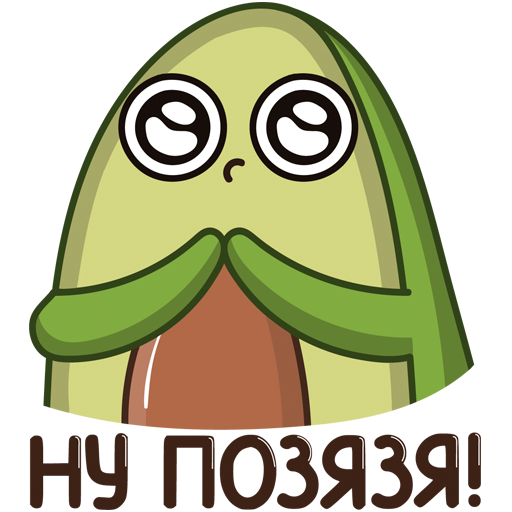

In [16]:
### поиск###
lev_dict = {}
x = str(input()).lower()
####поиск картинки###
for i in trash_dict:
    klev = simil(trash_dict[i],x)
    lev_dict[klev] = i
#print(lev_dict)
res = PIL.Image.open(lev_dict[max(lev_dict)])
res
#print(lev_dict)

In [9]:
### алгоритмы ###

### Левенштейн ###
def my_dist_cached(a, b):
    @lru_cache(maxsize=len(a) * len(b))
    def recursive(i, j):
        if i == 0 or j == 0:
            return max(i, j)
        elif a[i - 1] == b[j - 1]:
            return recursive(i - 1, j - 1)
        else:
            return 1 + min(
                recursive(i, j - 1),
                recursive(i - 1, j),
                recursive(i - 1, j - 1)
            )
    return recursive(len(a), len(b))

###Коэфициент Танимото###
def tanimoto(s1, s2):
    a, b, c = len(s1), len(s2), 0.0

    for sym in s1:
        if sym in s2:
            c += 1

    return c / (a + b - c)

###Дифлиб###
import difflib

def simil(s1,s2):
    matcher = difflib.SequenceMatcher(None, s1, s2)
    return matcher.ratio()

In [18]:
import logging

import telebot

API_TOKEN = '1433598427:AAFMI1BDQw0DZ_YTvMAc--0A3IZgmWV8nLw'

bot  = telebot.TeleBot(API_TOKEN)

@bot.message_handler(content_types=["text"])
def repeat_all_messages(message): # Название функции не играет никакой роли, в принципе
    g
    pic = open (lev_dict[max(lev_dict)],'rb')
    bot.send_photo(message.chat.id,pic)
    bot.send_message(message.chat.id, message.text)
    


    

if __name__ == '__main__':
     bot.polling(none_stop=True)

AttributeError: 'str' object has no attribute 'chat'